# Problem Statment

# Data Gathering

In [1]:
from sklearn.datasets import load_iris

In [2]:
import numpy as np
import pandas as pd

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
# iris = pd.read_csv('iris.csv')
# iris.head(2)

In [5]:
# iris.drop('Id',axis=1, inplace=True)
# iris.head(2)

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['Species']= iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
# csv.info()

# Feature Seletion

In [9]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

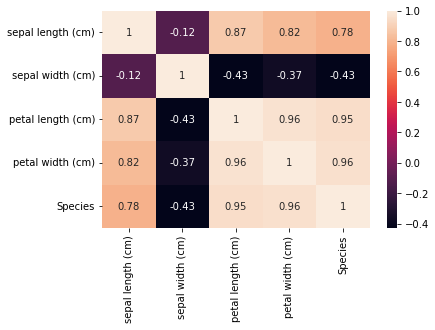

In [11]:
sns.heatmap(df.corr(), annot=True)

# Model Training

In [12]:
x= df.drop('Species',axis=1)
y= df['Species']

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

#### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=12, shuffle = True)

In [16]:
x_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
62,6.0,2.2,4.0,1.0
98,5.1,2.5,3.0,1.1
26,5.0,3.4,1.6,0.4
8,4.4,2.9,1.4,0.2


# Model Evluation

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
Li = LinearRegression()

# Lo = LogisticRegression()
# KNN = KNeighborsClassifier()
# DT = DecisionTreeClassifier()

In [19]:
Li.fit(x_train,y_train)   #Model 1

# Lo.fit(x_train,y_train)   #Model 2
# KNN.fit(x_train,y_train)  #Model 3
# DT.fit(x_train,y_train)   #Model 4

LinearRegression()

# Model 1 --- Linear Regression

#### Training Data Evaluation

In [20]:
y_pred_train_Li = Li.predict(x_train)

In [21]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

In [22]:
MSE = mse(y_train, y_pred_train_Li)
MSE

0.047596781936406436

In [23]:
RMSE = np.sqrt(MSE)
RMSE

0.21816686718291217

In [24]:
MAE = mae(y_train, y_pred_train_Li)
MAE

0.16838651453169157

In [25]:
r2 = r2_score(y_train,y_pred_train_Li)
r2.round(2)

0.93

#### Testing Data Evaluation

In [26]:
y_pred_test_Li = Li.predict(x_test)

In [27]:
MSE = mse(y_test,y_pred_test_Li)
RMSE = np.sqrt(MSE)
MAE = mae(y_test, y_pred_test_Li)
r2 = r2_score(y_test, y_pred_test_Li)

print('for Testing Data')
print('***'*20)
print('MSE :', MSE)
print('RMSE :', RMSE)
print('MAE :', MAE)
print('r2_score :', r2.round(2))

for Testing Data
************************************************************
MSE : 0.04329107978709588
RMSE : 0.20806508545908386
MAE : 0.15485752775905287
r2_score : 0.94


# Model 2 --- Logistic Regression

In [28]:
#We create the test-train split again for Logistic Regression b'cause
#the 'stratify' term is required in Logistic test-train split.

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=12, stratify= y)

In [30]:
# y_train.head()

In [31]:
# x_test.head()

In [32]:
Lo = LogisticRegression(multi_class='ovr')
Lo.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

#### Training Data Evaluation

In [33]:
y_pred_train_Lo = Lo.predict(x_train)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, multilabel_confusion_matrix

In [35]:
# from sklearn. metrics import precision_score, recall_score, f1_score           ...in clf report we gwt it all

C:\Users\sai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


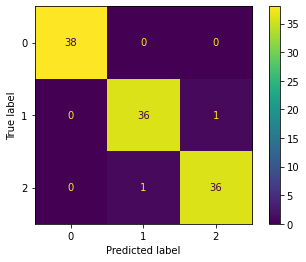

In [36]:
plot_confusion_matrix(Lo,x_train,y_train)

In [37]:
cnf_matrix = confusion_matrix(y_train, y_pred_train_Lo)
print(cnf_matrix)
print('**'*30)
acc_score = accuracy_score(y_train, y_pred_train_Lo)
print(acc_score.round(2))
print('**'*30)
clf_report = classification_report(y_train, y_pred_train_Lo)
print(clf_report)

[[38  0  0]
 [ 0 36  1]
 [ 0  1 36]]
************************************************************
0.98
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      0.97      0.97        37
           2       0.97      0.97      0.97        37

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112



In [38]:
#we also check accuracy for Logistic Model by,

Lo.score(x_train, y_train).round(2)

0.98

### For Train Data >>>> in LR model R2_score is '0.93' and here i.e. Lo model Acc is '0.98'

#### Testing Data Evaluation

C:\Users\sai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 144x144 with 0 Axes>

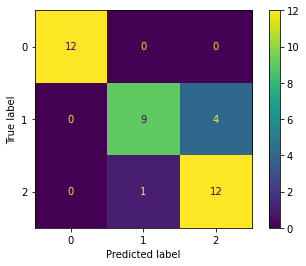

In [39]:
plt.figure(figsize=(2,2))
plot_confusion_matrix(Lo, x_test, y_test)

In [40]:
y_pred_test_Lo = Lo.predict(x_test)

In [41]:
cnf = confusion_matrix(y_test,y_pred_test_Lo)
print(cnf)
print('**'*30)
mult_cnf = multilabel_confusion_matrix(y_test,y_pred_test_Lo)
print(mult_cnf)
print('**'*30)
acc = accuracy_score(y_test, y_pred_test_Lo)
print(acc)
print('**'*30)
clf_rep = classification_report(y_test, y_pred_test_Lo)
print(clf_rep)

[[12  0  0]
 [ 0  9  4]
 [ 0  1 12]]
************************************************************
[[[26  0]
  [ 0 12]]

 [[24  1]
  [ 4  9]]

 [[21  4]
  [ 1 12]]]
************************************************************
0.868421052631579
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.69      0.78        13
           2       0.75      0.92      0.83        13

    accuracy                           0.87        38
   macro avg       0.88      0.87      0.87        38
weighted avg       0.88      0.87      0.87        38



In [42]:
Lo.score(x_test, y_test)      ## Accuracy

0.868421052631579

### For Test Data >>>> in LR model R2_score is '0.94' and here i.e. Lo model Acc is '0.87'

# Model 3 --- K Nearest Neighbour (KNN)--Classifier

We use KNN 'classifier' not 'regressor' b'cause the predition is 'categorical'.

In [43]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


#### in KNN Data scaling is required, but for given 'IRIS' data Scaling (normal or standard) is not required b'cause the all Independent Data is common scale which is 'cm'

For Logistic Regression & KNN classifier both train test split same. Both required stratify = y. So not require to write train test split for KNN classifier, it is present in above Logsitic already. 


In [44]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

#### Training Data Evaluation

In [45]:
y_pred_train_KNN = KNN.predict(x_train)
y_pred_train_KNN

array([2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2,
       1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [46]:
cnf = confusion_matrix(y_train, y_pred_train_KNN)
print(cnf)
print('**'*20)
acc = accuracy_score (y_train, y_pred_train_KNN)
print(acc)
print('**'*20)
clf_rep = classification_report(y_train, y_pred_train_KNN)
print(clf_rep)

[[38  0  0]
 [ 0 37  0]
 [ 0  1 36]]
****************************************
0.9910714285714286
****************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      1.00      0.99        37
           2       1.00      0.97      0.99        37

    accuracy                           0.99       112
   macro avg       0.99      0.99      0.99       112
weighted avg       0.99      0.99      0.99       112



In [47]:
KNN.score(x_train, y_train)

0.9910714285714286

#### For Train Data >>>> in LR model R2_score is '0.93' and here i.e. Lo model Acc is '0.98' Already as per above... AND KNN accuracy is 0.99

#### Testing Data Evaluation

In [48]:
y_pred_test_KNN = KNN.predict(x_test)
y_pred_test_KNN

array([1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2,
       1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0])

In [49]:
cnf = confusion_matrix(y_test, y_pred_test_KNN)
print(cnf)
print('**'*20)

Mul_cnf = multilabel_confusion_matrix(y_test, y_pred_test_KNN)
print(Mul_cnf)
print('**'*20)
acc = accuracy_score (y_test, y_pred_test_KNN)
print(acc)
print('**'*20)
clf_rep = classification_report(y_test, y_pred_test_KNN)
print(clf_rep)

[[12  0  0]
 [ 0 11  2]
 [ 0  0 13]]
****************************************
[[[26  0]
  [ 0 12]]

 [[25  0]
  [ 2 11]]

 [[23  2]
  [ 0 13]]]
****************************************
0.9473684210526315
****************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [50]:
KNN.score(x_test,y_test)

0.9473684210526315

#### For Test Data >>>> in LR model R2_score is '0.94' and here i.e. Lo model Acc is '0.87' ... AND in KNN 0.95 

# Model 4 --- Decision Tree 'Classification'

In [51]:
# x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=12, stratify= y)  
                                                                                        #...already present in Log Reg

In [52]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

Training Data

In [53]:
y_pred_train_DT = DT.predict(x_train)

cnf = confusion_matrix(y_train, y_pred_train_DT)
print(cnf)
print('**'*20)

mul_cnf = multilabel_confusion_matrix(y_train, y_pred_train_DT)
print(mul_cnf)
print('**'*20)

acc = accuracy_score(y_train, y_pred_train_DT)
print(acc)
print('**'*20)

acc_met2 = DT.score(x_train,y_train)
print(acc_met2)
print('**'*20)

clf_report = classification_report(y_train, y_pred_train_DT)
print(clf_report)

[[38  0  0]
 [ 0 37  0]
 [ 0  0 37]]
****************************************
[[[74  0]
  [ 0 38]]

 [[75  0]
  [ 0 37]]

 [[75  0]
  [ 0 37]]]
****************************************
1.0
****************************************
1.0
****************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



### For Train Data >>>> In LR model R2_score is '0.93', Lo model Acc is '0.98', KNN accuracy is 0.99, DT 1.0

Testing Data

In [54]:
y_pred_test_DT = DT.predict(x_test)

cnf = confusion_matrix(y_test, y_pred_test_DT)
print(cnf)
print('**'*20)

mul_cnf = multilabel_confusion_matrix(y_test, y_pred_test_DT)
print(mul_cnf)
print('**'*20)

acc = accuracy_score(y_test, y_pred_test_DT)
print(acc)
print('**'*20)

acc_met2 = DT.score(x_test,y_test)
print(acc_met2)
print('**'*20)

clf_report = classification_report(y_test, y_pred_test_DT)
print(clf_report)

[[12  0  0]
 [ 0  9  4]
 [ 0  1 12]]
****************************************
[[[26  0]
  [ 0 12]]

 [[24  1]
  [ 4  9]]

 [[21  4]
  [ 1 12]]]
****************************************
0.868421052631579
****************************************
0.868421052631579
****************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.69      0.78        13
           2       0.75      0.92      0.83        13

    accuracy                           0.87        38
   macro avg       0.88      0.87      0.87        38
weighted avg       0.88      0.87      0.87        38



### For Test Data >>>> in LR model R2_score is '0.94', Lo model Acc is '0.87', KNN 0.95 & DT '0.87'

### Plot Tree

In [55]:
from sklearn.tree import plot_tree

In [56]:
plt.figure(figsize=(200,180))
plot_tree(DT, feature_names=x.columns, class_names= ['0','1','2'], filled=True)
plt.savefig('DT_Iris_wo_Hyp.png')

In [57]:
# pip install scikit-learn==0.22.1

### From Accuracy we decide the KNN Classification accuracy is more so we can use it for prediction.

In [58]:
test_array = np.zeros(x.shape[1])
test_array

array([0., 0., 0., 0.])

In [59]:
test_array.shape[0]

4

In [60]:
column_names = x_train.columns
column_names

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [61]:
#user Input

sepal_length = 2.5
sepal_width= 4.6
petal_length= 5.2
petal_width= 0.3

In [64]:
test_array[0]= sepal_length
test_array[1]= sepal_width
test_array[2]= petal_length
test_array[3]= petal_width

print(test_array)

[2.5 4.6 5.2 0.3]


In [66]:
ar= np.array([[sepal_length,sepal_width, petal_length,petal_width]])
ar

array([[2.5, 4.6, 5.2, 0.3]])

In [77]:
pred = KNN.predict(ar)[0]

type(str(pred))


C:\Users\sai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


str

In [84]:
KNN.predict(ar)

C:\Users\sai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
# df['Species'].value_counts()

In [ ]:
# df['Species'].replace({0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'},inplace=True)
# df['Species'].value_counts()

In [ ]:
# KNN.predict([test_array])

In [88]:
import pickle

with open ('KNN_model.pkl', 'wb') as f:
    pickle.dump(KNN,f)

In [87]:
with open ('DT_model.pkl', 'wb') as f:
     pickle.dump(DT,f)